In [1]:
import matplotlib.pyplot as plt

import numpy as np
from numpy.linalg import norm 

from method_functions import NewtonDescent, BFGSNewtonDescent, trustRegionMethod
from functions import Rosenbrock, RosenbrockH, RosenbrockJ, Bowl, BowlJ, BowlH 

Root: [1. 1.] 
	 Number of iterations: 64
Root: [1. 1.] 
	 Number of iterations: 54


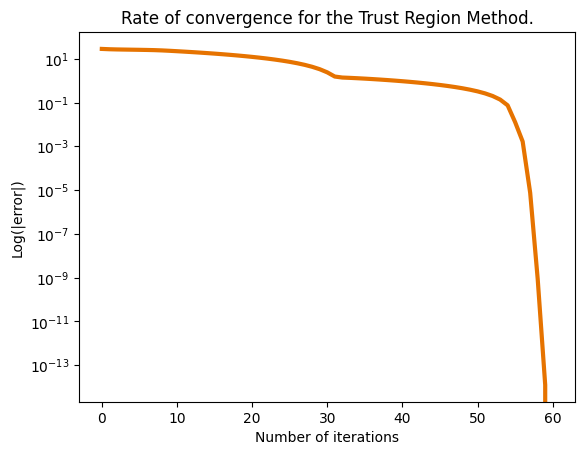

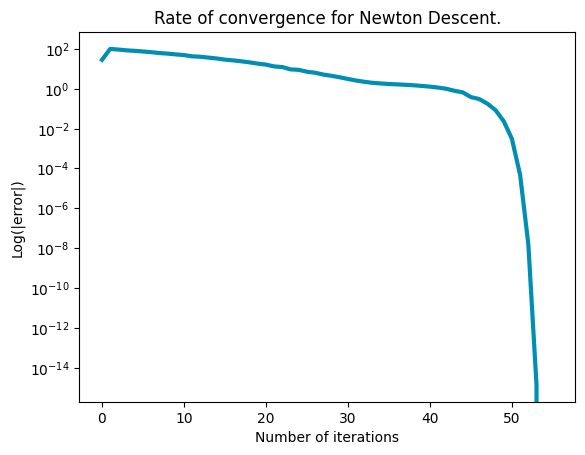

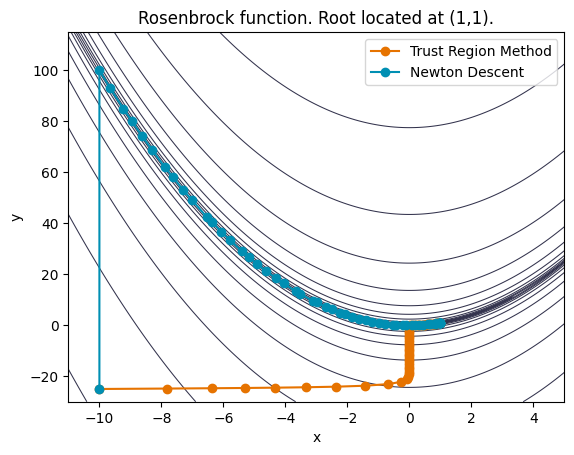

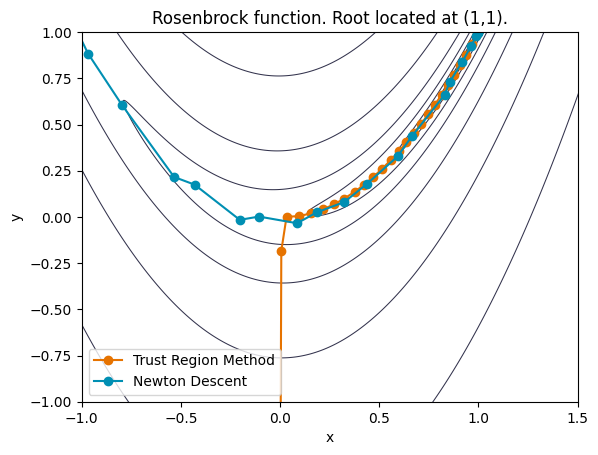

In [2]:
import matplotlib.pyplot as plt

import numpy as np
from numpy.linalg import norm 

from method_functions import NewtonDescent, BFGSNewtonDescent, trustRegionMethod
from functions import Rosenbrock, RosenbrockH, RosenbrockJ, Bowl, BowlJ, BowlH 


# Initial conditions and other parameters
x0 = [-10, -25]; tol = 1e-16; Nmax = 100000

# Finds the roots with Gradient Descent and then returns and prints the output
root, error, iterations, TRSteps = trustRegionMethod(x0, Rosenbrock, RosenbrockJ, RosenbrockH, tol, Nmax, deltak=1, eta=0.5)
print("Root:", root, "\n\t Number of iterations:", iterations)

# Finds the roots with Newton Descent and then returns and prints the output
root, error, iterations, NDSteps = NewtonDescent(x0, Rosenbrock, RosenbrockJ, RosenbrockH, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

# Converts the lists into numpy arrays for plotting
TRSteps = np.array(TRSteps)
NDSteps = np.array(NDSteps)

# Choice of the true value of the root
x_root = 1; y_root = 1

# Calculation of the error for each of the axes
TR_error = np.array([abs(x_root - TRSteps[:,0]), abs(y_root - TRSteps[:,1])])
ND_error = np.array([abs(x_root - NDSteps[:,0]), abs(y_root - NDSteps[:,1])])

# Calculates the norm distance for each of the iterations
TR_error = np.sum(np.abs(TR_error)**2,axis=0)**(1./2)
ND_error = np.sum(np.abs(ND_error)**2,axis=0)**(1./2)


# Log plot of the error for Gradient Descent
plt.semilogy(TR_error,
             color="#e67300",
             linewidth=3)
plt.xlabel("Number of iterations"); plt.ylabel("Log(|error|)"); plt.title("Rate of convergence for the Trust Region Method.")
plt.show()

# Log plot of the error for Gradient Descent
plt.semilogy(ND_error,
             color="#008fb3",
             linewidth=3)
plt.xlabel("Number of iterations"); plt.ylabel("Log(|error|)"); plt.title("Rate of convergence for Newton Descent.")
plt.show()

# Plot of the Rosenbrock function 
plt.plot(TRSteps[:,0], TRSteps[:,1],
            color='#e67300',
            marker="o",
            zorder=1,
            label="Trust Region Method")
plt.plot(NDSteps[:,0], NDSteps[:,1],
            color='#008fb3',
            marker="o",
            zorder=1,
            label="Newton Descent")

# Grid for plotting the function
x = np.linspace(-11, 5, 1000)
y = np.linspace(-30, 115, 1000)
X, Y = np.meshgrid(x, y)
evalPoints = [X, Y]

plt.contour(X, Y, Rosenbrock(evalPoints),
            levels=np.logspace(-50, 50, 200),
            colors='#33334d',
            linewidths=0.75,
            zorder=0)
plt.legend(); plt.title("Rosenbrock function. Root located at" + r" (1,1)."); plt.xlabel("x"); plt.ylabel("y")
plt.show()


# Plot of the Rosenbrock function 
plt.plot(TRSteps[:,0], TRSteps[:,1],
            color='#e67300',
            marker="o",
            zorder=1,
            label="Trust Region Method")
plt.plot(NDSteps[:,0], NDSteps[:,1],
            color='#008fb3',
            marker="o",
            zorder=2,
            label="Newton Descent")

# Grid for plotting the function
x = np.linspace(-2, 2.4, 1000)
y = np.linspace(-3, 5, 1000)
X, Y = np.meshgrid(x, y)
evalPoints = [X, Y]

plt.contour(X, Y, Rosenbrock(evalPoints),
            levels=np.logspace(-40, 10, 80),
            colors='#33334d',
            linewidths=0.75,
            zorder=0)
plt.xlim(-1,1.5)
plt.ylim(-1,1)
plt.legend(); plt.title("Rosenbrock function. Root located at" + r" (1,1)."); plt.xlabel("x"); plt.ylabel("y")
plt.show()
